In [1]:
require(data.table)

Loading required package: data.table
Warning message:
"package 'data.table' was built under R version 3.6.2"

Setting a seed to have reproducible results

In [2]:
set.seed(95)

# Q1

Defining a function that produces 1000 uniform random variables between -1 and 1, will be used in Q1

In [3]:
get_dim <- function(){return(runif(1000, min = -1, max = 1))}

As asked in question 1, 15 datasets of dimensions from 1 to 15 are created all having 1000 instances filled with unfiorm random variables from 1 to 1

In [4]:
d1 = data.table(replicate(1, get_dim()))
d2 = data.table(replicate(2, get_dim()))
d3 = data.table(replicate(3, get_dim()))
d4 = data.table(replicate(4, get_dim()))
d5 = data.table(replicate(5, get_dim()))
d6 = data.table(replicate(6, get_dim()))
d7 = data.table(replicate(7, get_dim()))
d8 = data.table(replicate(8, get_dim()))
d9 = data.table(replicate(9, get_dim()))
d10 = data.table(replicate(10, get_dim()))
d11 = data.table(replicate(11, get_dim()))
d12 = data.table(replicate(12, get_dim()))
d13 = data.table(replicate(13, get_dim()))
d14 = data.table(replicate(14, get_dim()))
d15 = data.table(replicate(15, get_dim()))

## 1.a)
* Here, it is asked to find the fraction of points in a ball with radius 1 around origin for different dimensions
* For each dimension, using euclidean distance, distance from origin of each point is calculated.
* Then, number of rows whose distance to origin is lower than 1 is divided by total row count.
* Fraction values are plotted in dimension order

In [5]:
myfun <- function(x){return(x^2)}

d1[, d_o:= sqrt(rowSums(sapply(d1[,c(1)], myfun)))]
d2[, d_o:= sqrt(rowSums(sapply(d2[,c(1,2)], myfun)))]
d3[, d_o:= sqrt(rowSums(sapply(d3[,c(1:3)], myfun)))]
d4[, d_o:= sqrt(rowSums(sapply(d4[,c(1:4)], myfun)))]
d5[, d_o:= sqrt(rowSums(sapply(d5[,c(1:5)], myfun)))]
d6[, d_o:= sqrt(rowSums(sapply(d6[,c(1:6)], myfun)))]
d7[, d_o:= sqrt(rowSums(sapply(d7[,c(1:7)], myfun)))]
d8[, d_o:= sqrt(rowSums(sapply(d8[,c(1:8)], myfun)))]
d9[, d_o:= sqrt(rowSums(sapply(d9[,c(1:9)], myfun)))]
d10[, d_o:= sqrt(rowSums(sapply(d10[,c(1:10)], myfun)))]
d11[, d_o:= sqrt(rowSums(sapply(d11[,c(1:11)], myfun)))]
d12[, d_o:= sqrt(rowSums(sapply(d12[,c(1:12)], myfun)))]
d13[, d_o:= sqrt(rowSums(sapply(d13[,c(1:13)], myfun)))]
d14[, d_o:= sqrt(rowSums(sapply(d14[,c(1:14)], myfun)))]
d15[, d_o:= sqrt(rowSums(sapply(d15[,c(1:15)], myfun)))]

In [6]:
fractions <- list(
    sum(d1[,d_o<=1]) / nrow(d1),
    sum(d2[,d_o<=1]) / nrow(d2),
    sum(d3[,d_o<=1]) / nrow(d3),
    sum(d4[,d_o<=1]) / nrow(d4),
    sum(d5[,d_o<=1]) / nrow(d5),
    sum(d6[,d_o<=1]) / nrow(d6),
    sum(d7[,d_o<=1]) / nrow(d7),
    sum(d8[,d_o<=1]) / nrow(d8),
    sum(d9[,d_o<=1]) / nrow(d9),
    sum(d10[,d_o<=1]) / nrow(d10),
    sum(d11[,d_o<=1]) / nrow(d11),
    sum(d12[,d_o<=1]) / nrow(d12),
    sum(d13[,d_o<=1]) / nrow(d13),
    sum(d14[,d_o<=1]) / nrow(d14),
    sum(d15[,d_o<=1]) / nrow(d15)
    )

In [7]:
frac <- data.table(dimension=c(1:15), fraction=fractions)

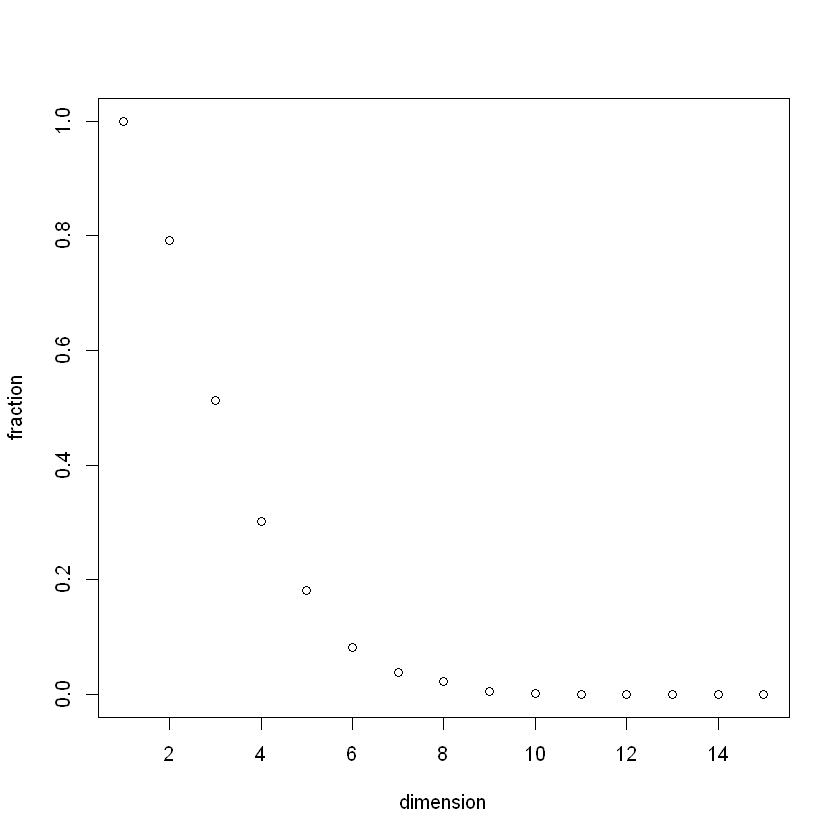

In [8]:
plot(frac)

* We see that as the number of dimension increases, fraction and the number of points within the ball with radius 1 decreases.
* This implies that the data gets sparse as  dimension gets higher.

## 1.b)
* Here we are asked to approximate pi using 2D & 3D fractions

* For 2D, Area of the circle = (pi) * r * r ; we have r=1, thus area = pi 
    * Area of the circle = Area of the square * fraction, where area of the square is 2x2=4
    * Hence pi = 4 * fraction 
* For 3D, Volume of the sphere = (pi) * r * r * r * 4 / 3; we have r=1, thus volume = pi * 4 /3
    * Volume of the sphere = Volume of the cube * fraction, where volume of the cube is 2x2x2=8
    * So: pi = 8 * fraction * 3 / 4

In [9]:
area = as.numeric(frac[frac$dimension==2]$fraction) * 4
volume = as.numeric(frac[frac$dimension==3]$fraction) * 8

In [10]:
area
volume*3/4

[1] 3.172

[1] 3.078

## 1.c)
* Here we are asked to write a function that calculates pi approximations for different sample sizes and plot results
* Using the formulations found in 1)b fuction is created

In [11]:
myfun <- function(x){return(x^2)}

get_pi <- function(dim, size){
    pi = 0
    
    df = data.table(replicate(dim, runif(size, min = -1, max = 1)))
    df[, d_o:= sqrt(rowSums(sapply(df, myfun)))]
    fr = sum(df[,d_o<=1]) / nrow(df)
    
    if(dim==2){pi = fr*4}
    if(dim==3){pi = fr*8*3/4}
    
    return(pi)
    }

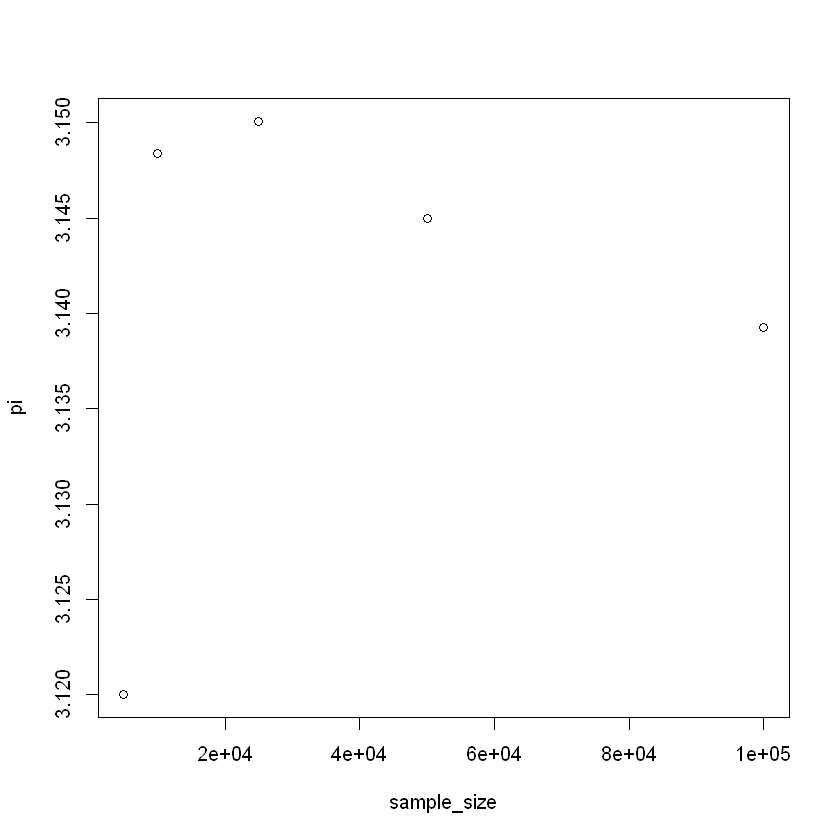

In [12]:
d2_pi_values = c(get_pi(2,5000),
                 get_pi(2,10000),
                 get_pi(2,25000),
                 get_pi(2,50000),
                 get_pi(2,100000))

d2_pi = data.table(sample_size=c(5000, 10000, 25000, 50000, 100000), pi = d2_pi_values)
plot(d2_pi)

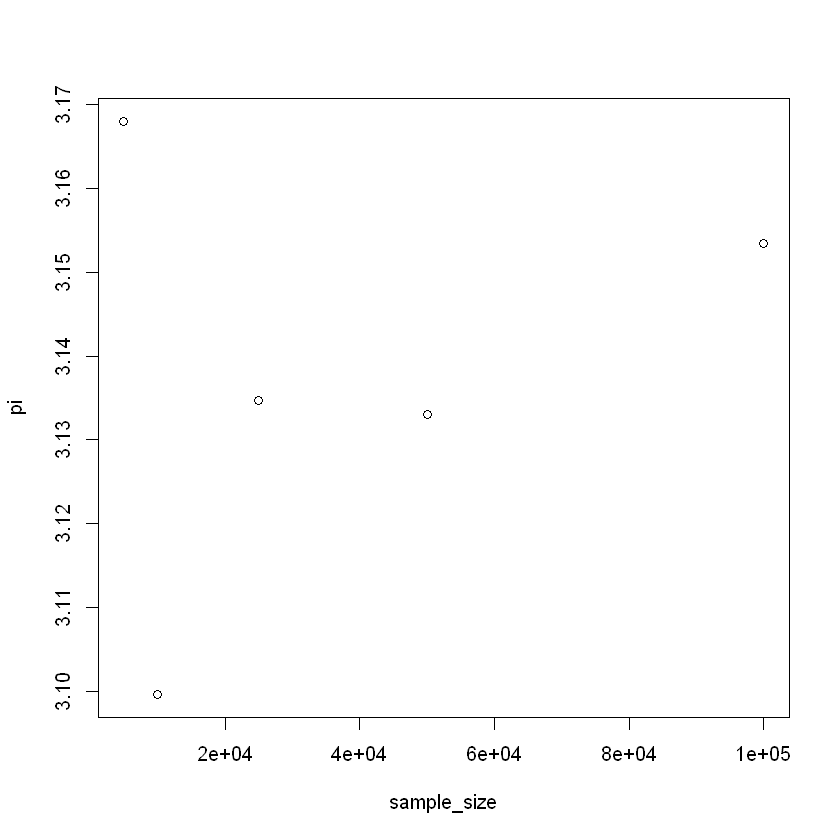

In [13]:
d3_pi_values = c(get_pi(3,5000),
                 get_pi(3,10000),
                 get_pi(3,25000),
                 get_pi(3,50000),
                 get_pi(3,100000))

d3_pi = data.table(sample_size=c(5000, 10000, 25000, 50000, 100000), pi = d3_pi_values)
plot(d3_pi)

* We can see that as sample size increases, approximations gets more accurate. 
* For some cases, lower sample sizes can give more accurate approximations, however, it is by chance. It does not occur most of the time.

## 1.d)
* Here we are asked to find avg closest negihbor distances for different dimensions.
* It is asked to create 1000 data points and add 100 test points, but I created them at once, since it is basically the same.
* I created distance matrix (1100 x 1100) which gives all distances from 1 point to another
* Since we are interested in the distance from test points to initial points, distances from last 100 points to first 1000 points is taken as distances
* min of these distances are stored in closest_distance
* the function outputs average of the minimum distances

In [14]:
neighbor <- function(dim){
    df = data.table(replicate(dim, runif(1100, min = -1, max = 1)))
    d = dist(df,  method = "euclidean")
    distances = as.matrix(d)[1:1000,1001:1100]
    closest_distance <- apply(distances,2,min)
    avg = mean(closest_distance)
    return(avg)
    }

In [27]:
nn = c()
for(d in 1:15){
    nn <- c(nn, neighbor(d))
}

In [29]:
nn_dt = data.table(dim=c(1:15), average_min_distance=nn)

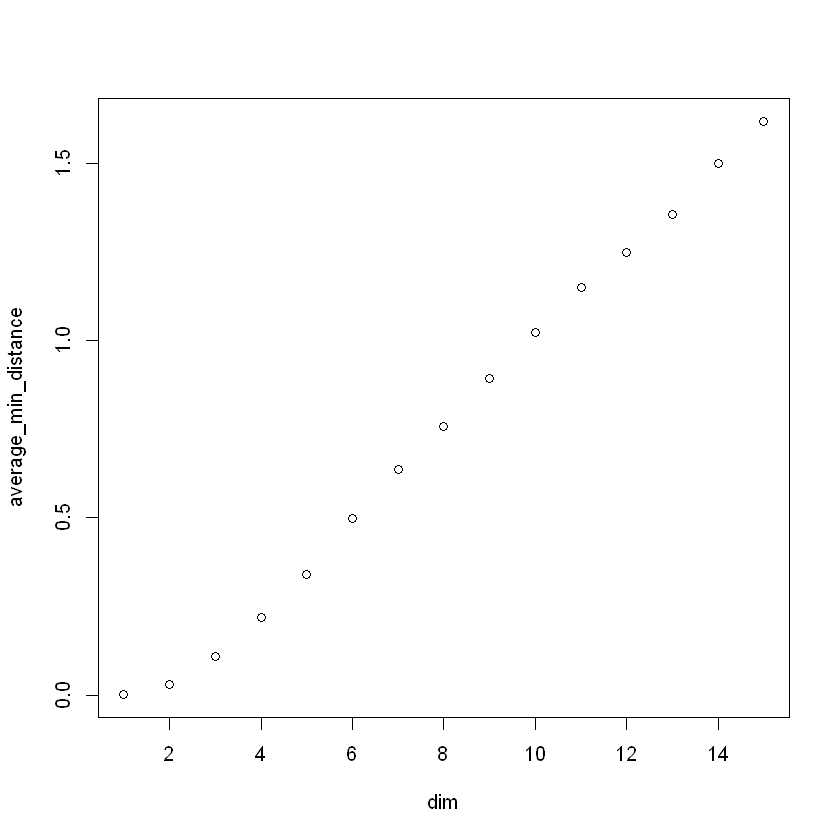

In [30]:
plot(nn_dt)

* We see that the average minimum distance linearly increases as dimension increases
* Distance between points increases as dimension gets increases
* Simlar to 1)a wee see that data gets sparse as dimension increases

# Q2

## 2)a
* We are asked to read a picture, display it and examine its structure.

In [31]:
require(jpeg)

Loading required package: jpeg


In [32]:
picture <- readJPEG("picture.jpg")

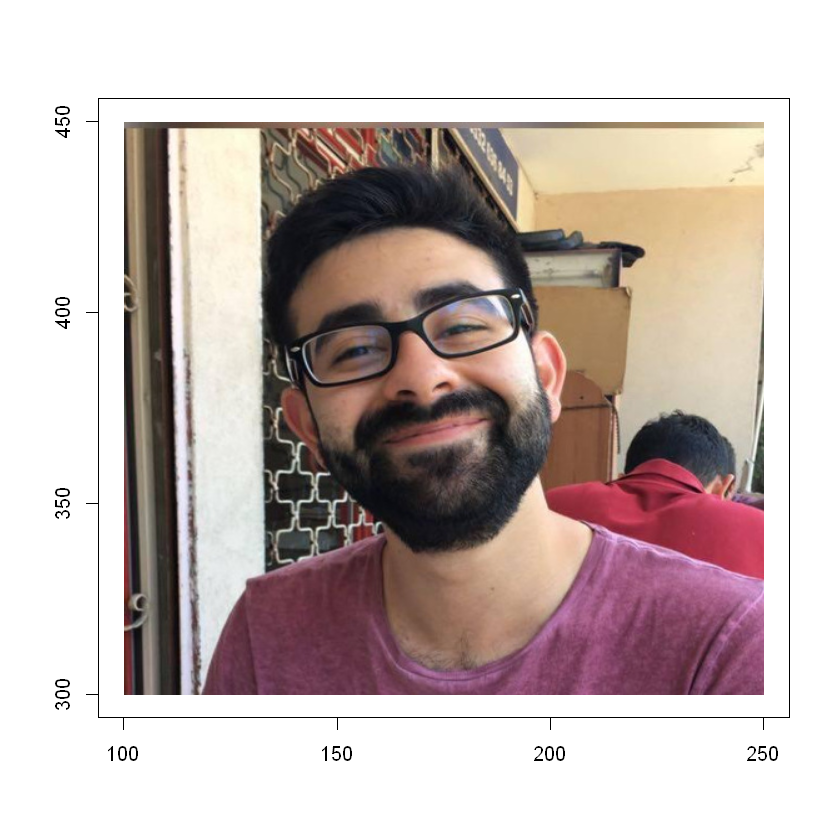

In [33]:
plot(c(100, 250), c(300, 450), type = "n", xlab = "", ylab = "")
rasterImage(picture, 100, 300, 250, 450)

In [34]:
str(picture)

 num [1:512, 1:512, 1:3] 0.522 0.529 0.537 0.529 0.502 ...


* This is a 3 dimensional array
* RGB values for each pixel (3 values for 512x512 pixels)
* I guess, each three value is called a channel
* Each channel provide a greyscale image
* To explore more, I printed some parts of the array

In [35]:
picture[1,1:10,]

[,1]      [,2]      [,3]     
 [1,] 0.5215686 0.4941176 0.4549020
 [2,] 0.5254902 0.4980392 0.4588235
 [3,] 0.5254902 0.4980392 0.4666667
 [4,] 0.5098039 0.4823529 0.4509804
 [5,] 0.4862745 0.4588235 0.4352941
 [6,] 0.4666667 0.4392157 0.4156863
 [7,] 0.4588235 0.4313725 0.4078431
 [8,] 0.4588235 0.4313725 0.4078431
 [9,] 0.4509804 0.4156863 0.4196078
[10,] 0.4470588 0.4156863 0.4078431

In [36]:
picture[1:10,1:10,2]

[,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]     
 [1,] 0.4941176 0.4980392 0.4980392 0.4823529 0.4588235 0.4392157 0.4313725
 [2,] 0.5019608 0.4901961 0.4823529 0.4784314 0.4666667 0.4549020 0.4431373
 [3,] 0.4980392 0.4823529 0.4823529 0.4745098 0.4470588 0.4274510 0.4235294
 [4,] 0.4862745 0.4784314 0.4745098 0.4705882 0.4509804 0.4392157 0.4392157
 [5,] 0.4627451 0.4784314 0.4823529 0.4666667 0.4549020 0.4313725 0.4117647
 [6,] 0.3254902 0.4509804 0.5254902 0.5333333 0.5294118 0.5176471 0.5294118
 [7,] 0.2392157 0.4392157 0.5450980 0.5450980 0.5450980 0.5333333 0.5568627
 [8,] 0.2431373 0.4392157 0.5254902 0.5137255 0.5450980 0.5411765 0.5450980
 [9,] 0.2705882 0.4431373 0.5411765 0.5333333 0.5294118 0.5176471 0.5333333
[10,] 0.2549020 0.4274510 0.5294118 0.5333333 0.5333333 0.5333333 0.5490196
      [,8]      [,9]      [,10]    
 [1,] 0.4313725 0.4156863 0.4156863
 [2,] 0.4274510 0.4235294 0.4117647
 [3,] 0.4117647 0.4235294 0.4117647
 [4,] 0.4392157 0.4117647 0.4117647
 [5,] 0.4078431 0.4352941 0.4235294
 [6,] 0.5803922 0.5921569 0.5490196
 [7,] 0.6470588 0.6549020 0.6000000
 [8,] 0.6156863 0.6509804 0.6039216
 [9,] 0.6000000 0.6352941 0.5960784
[10,] 0.6196078 0.6549020 0.6039216

## 2)b
* We are asked to print each channel of the picture separately

In [37]:
picture_1 = picture[,,1]
picture_2 = picture[,,2]
picture_3 = picture[,,3]

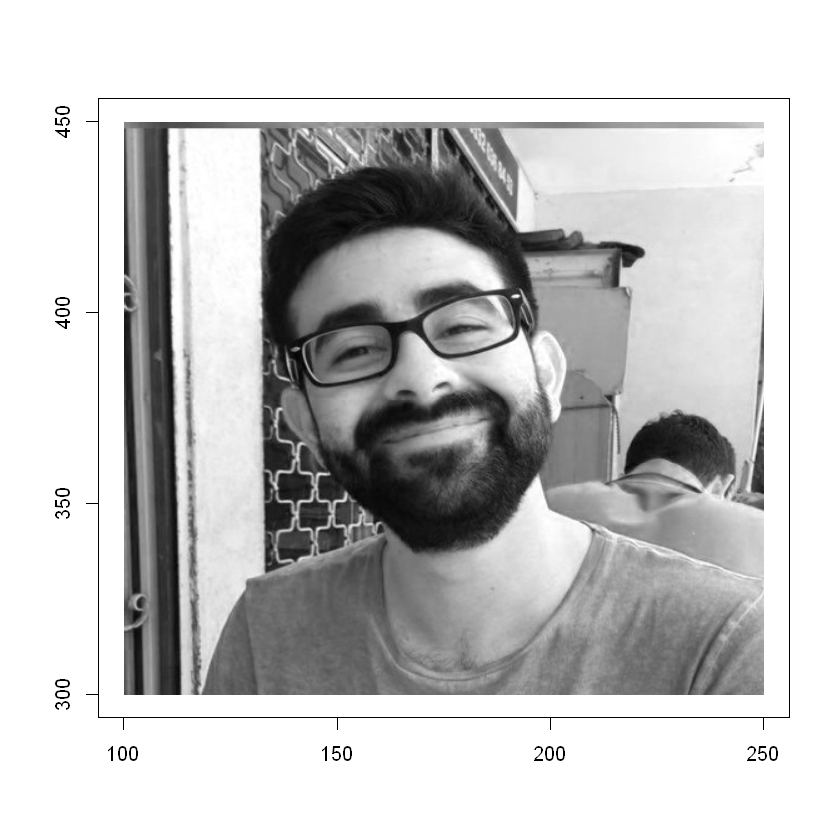

In [38]:
plot(c(100, 250), c(300, 450), type = "n", xlab = "", ylab = "")
rasterImage(picture_1, 100, 300, 250, 450)

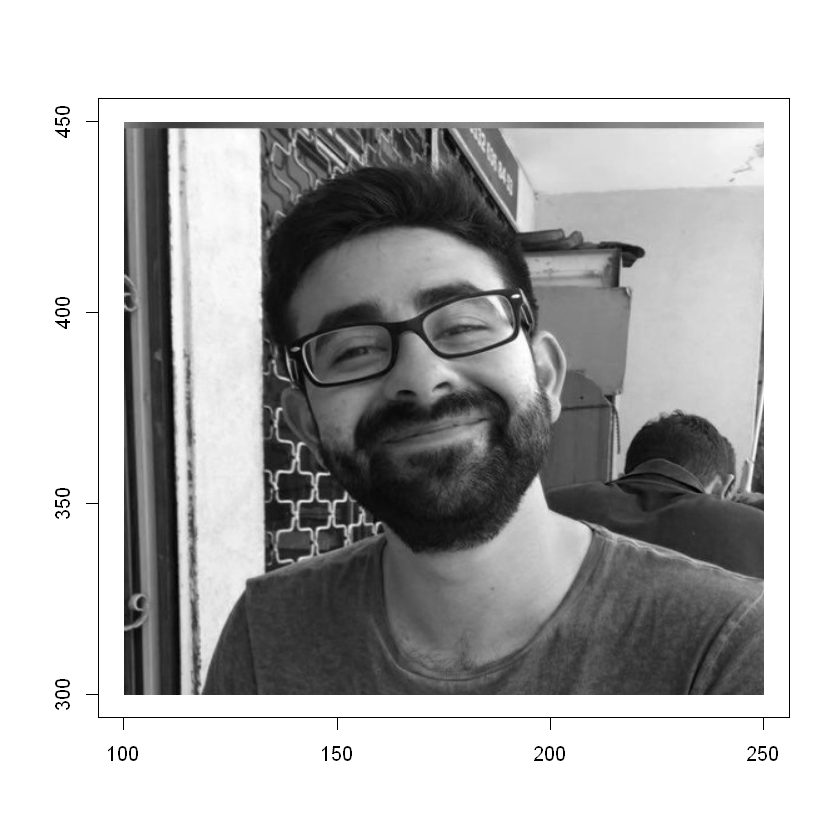

In [39]:
plot(c(100, 250), c(300, 450), type = "n", xlab = "", ylab = "")
rasterImage(picture_2, 100, 300, 250, 450)

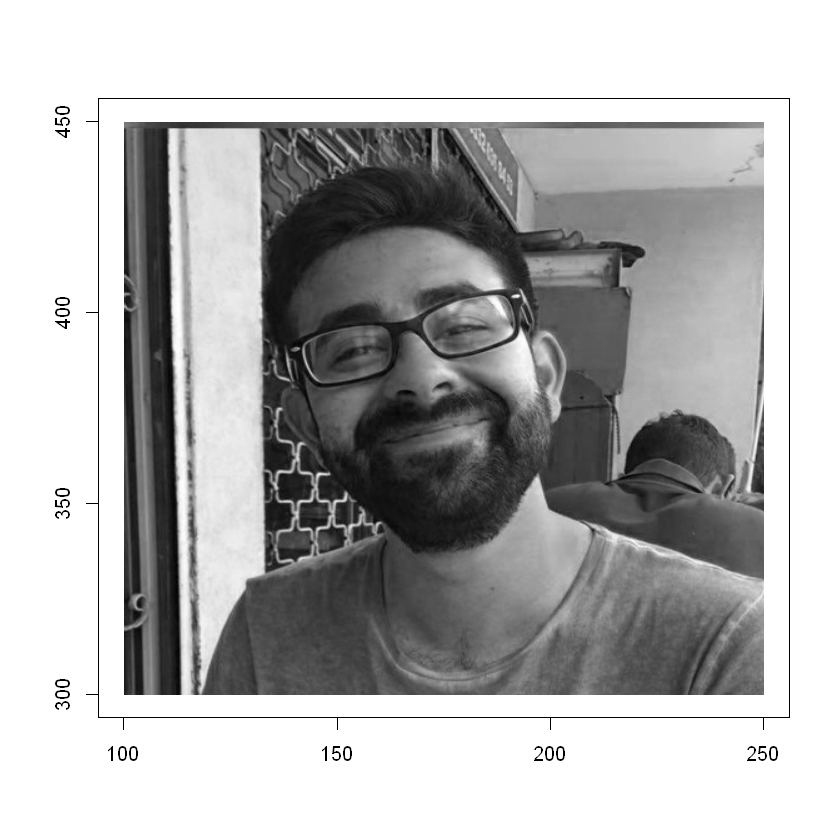

In [40]:
plot(c(100, 250), c(300, 450), type = "n", xlab = "", ylab = "")
rasterImage(picture_3, 100, 300, 250, 450)

These look like slighly different greyscale pictures.

## 2)c
* Here we are asked to plot averages of each column in each channel together

In [41]:
str(picture_1)

 num [1:512, 1:512] 0.522 0.529 0.537 0.529 0.502 ...


Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"

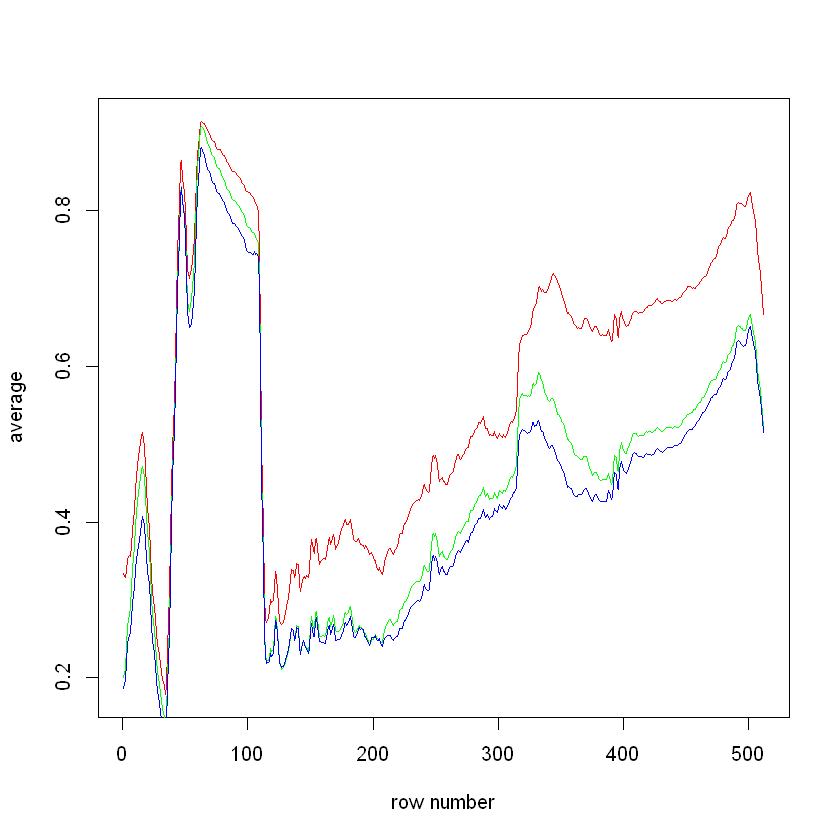

In [42]:
plot(colMeans(picture_1), col="red", type="line", xlab="row number", ylab="average")
lines(colMeans(picture_2), col="green")
lines(colMeans(picture_3), col="blue")

I am wearing pink and the guy behind me is wearing red, the first channel may be related with red color actually.

## 2)d
* Here we are asked to subtract one half of the picture from another

In [43]:
new_picture <- picture

In [44]:
new_picture[,1:256,1] <- new_picture[,1:256,1] - new_picture[,257:512,1]
new_picture[,1:256,2] <- new_picture[,1:256,2] - new_picture[,257:512,2]
new_picture[,1:256,3] <- new_picture[,1:256,3] - new_picture[,257:512,3]

In [45]:
new_picture[new_picture<0] <- 0

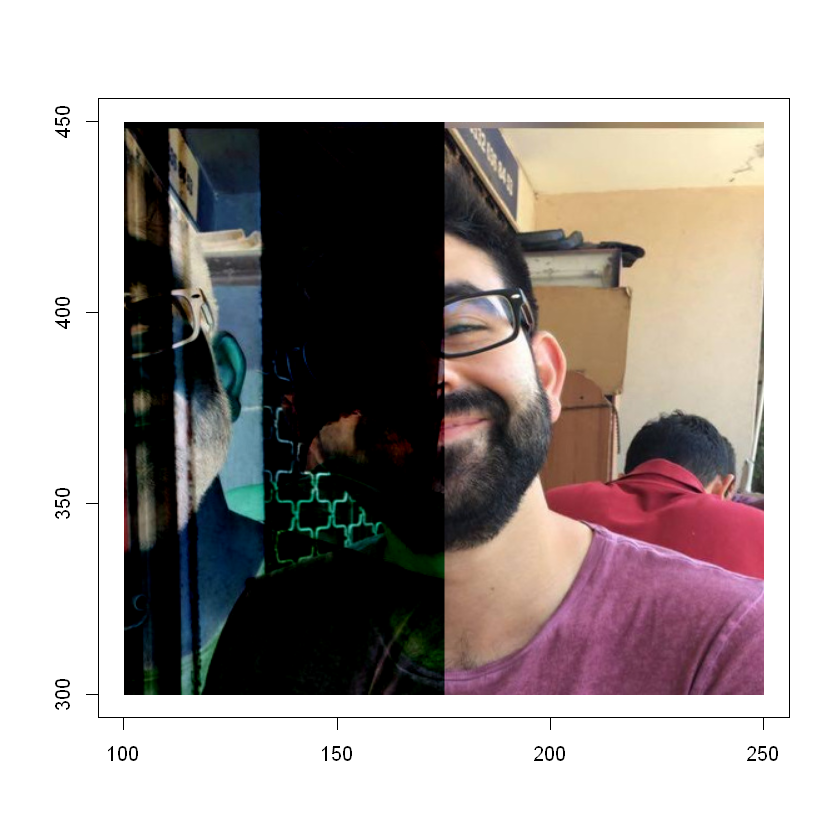

In [46]:
plot(c(100, 250), c(300, 450), type = "n", xlab = "", ylab = "")
rasterImage(new_picture, 100, 300, 250, 450)

* Subtracting black results in white, similarly subtracting white or open color results in negatives or zeros, in other words blacks

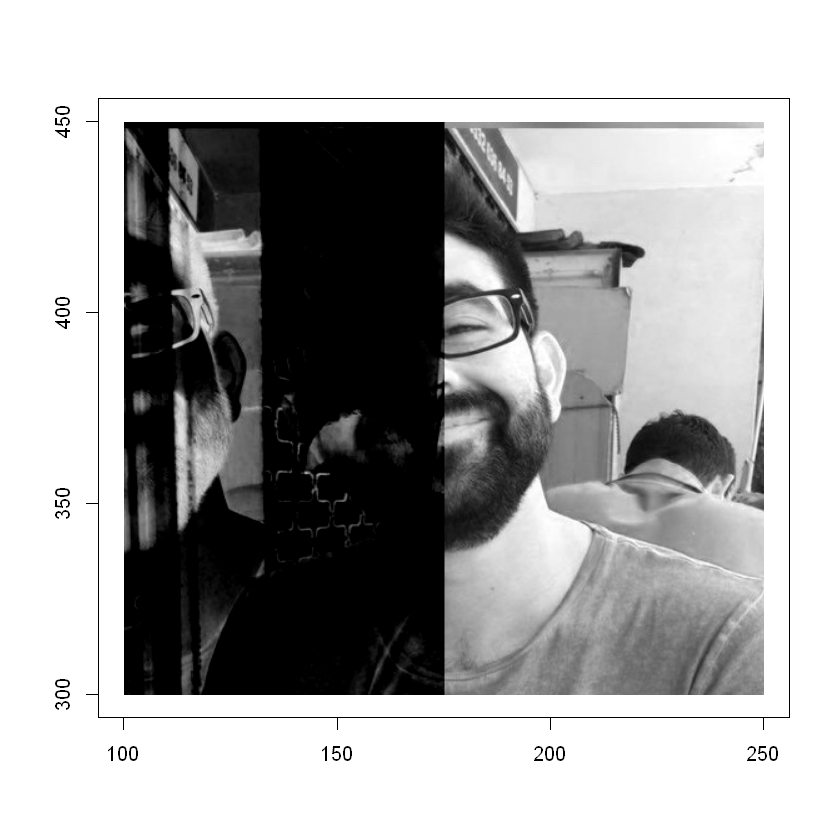

In [47]:
plot(c(100, 250), c(300, 450), type = "n", xlab = "", ylab = "")
rasterImage(new_picture[,,1], 100, 300, 250, 450)

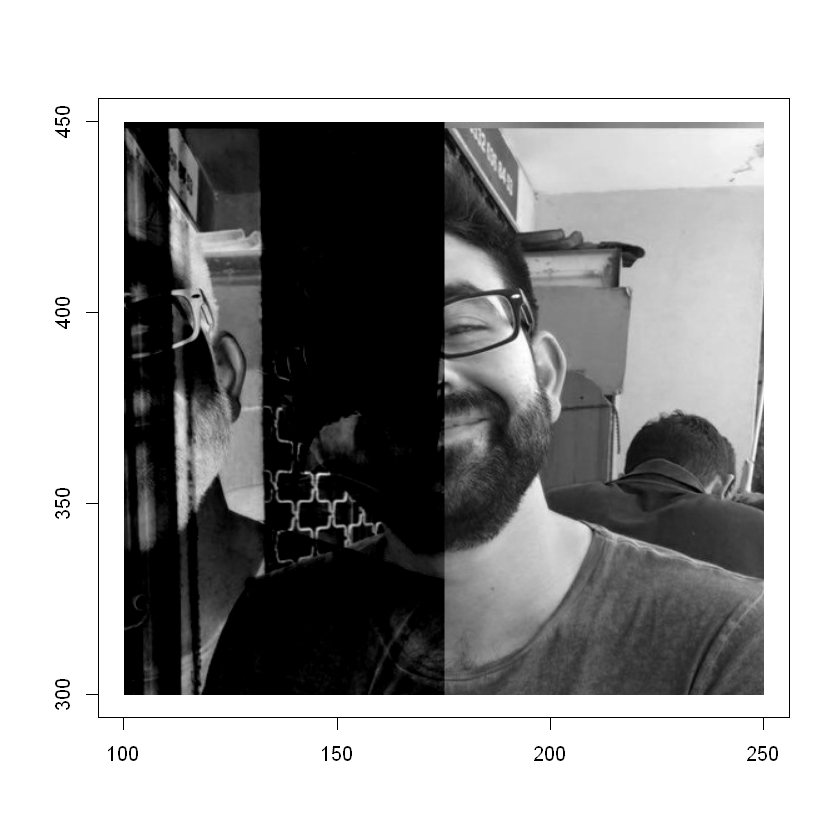

In [48]:
plot(c(100, 250), c(300, 450), type = "n", xlab = "", ylab = "")
rasterImage(new_picture[,,2], 100, 300, 250, 450)

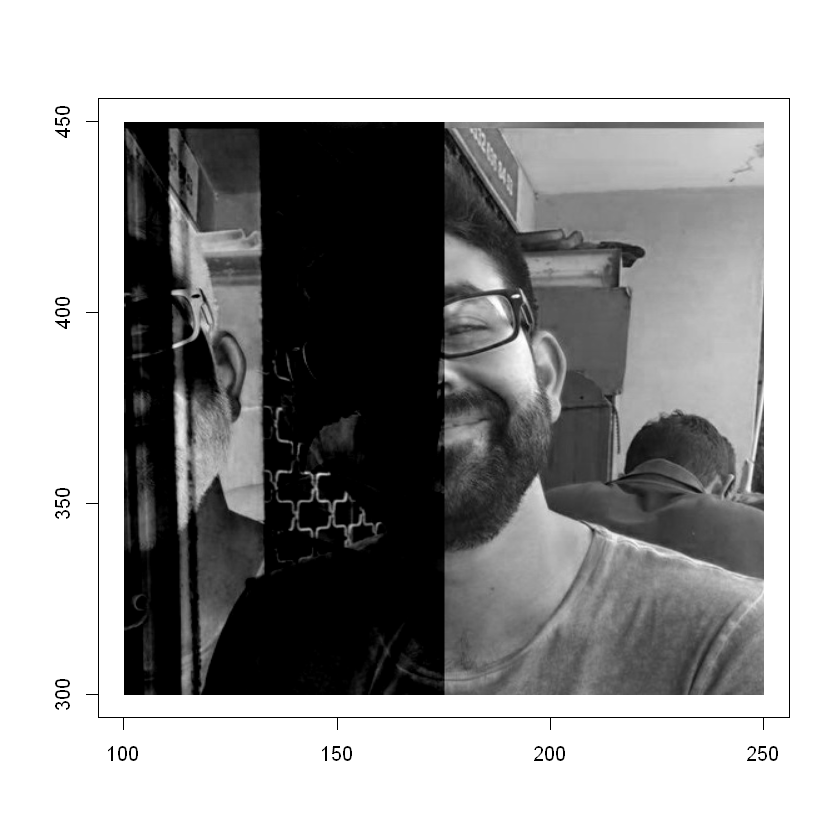

In [49]:
plot(c(100, 250), c(300, 450), type = "n", xlab = "", ylab = "")
rasterImage(new_picture[,,3], 100, 300, 250, 450)

## 2)e
* Here we are asked to add noise to image using uniform random varaibles 

In [50]:
max(picture)

[1] 1

In [51]:
noisy <- picture

In [52]:
noisy[,,1] <- noisy[,,1] + replicate(512, runif(512, min = 0, max = 0.1))
noisy[,,2] <- noisy[,,2] + replicate(512, runif(512, min = 0, max = 0.1))
noisy[,,3] <- noisy[,,3] + replicate(512, runif(512, min = 0, max = 0.1))

Reduce to 1 if the value exceeds 1

In [53]:
noisy[noisy>1] <- 1

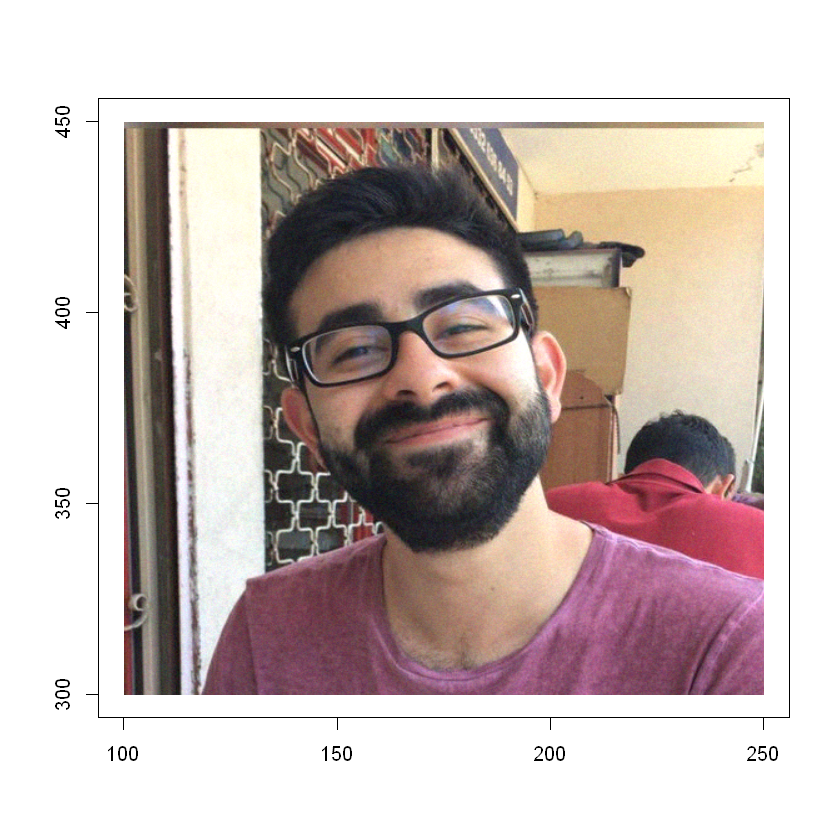

In [54]:
plot(c(100, 250), c(300, 450), type = "n", xlab = "", ylab = "")
rasterImage(noisy, 100, 300, 250, 450)

Here the noise is barely noticable, I, by mistake, set max value of the random var. to 1, it was way noisy, I added it to the bottom, as well.

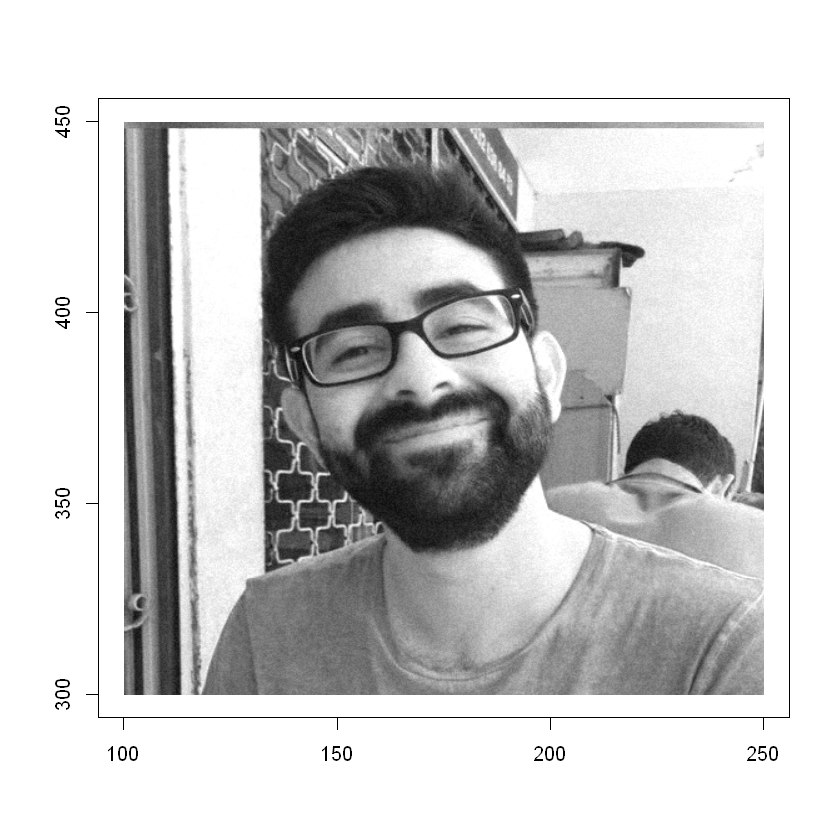

In [55]:
plot(c(100, 250), c(300, 450), type = "n", xlab = "", ylab = "")
rasterImage(noisy[,,1], 100, 300, 250, 450)

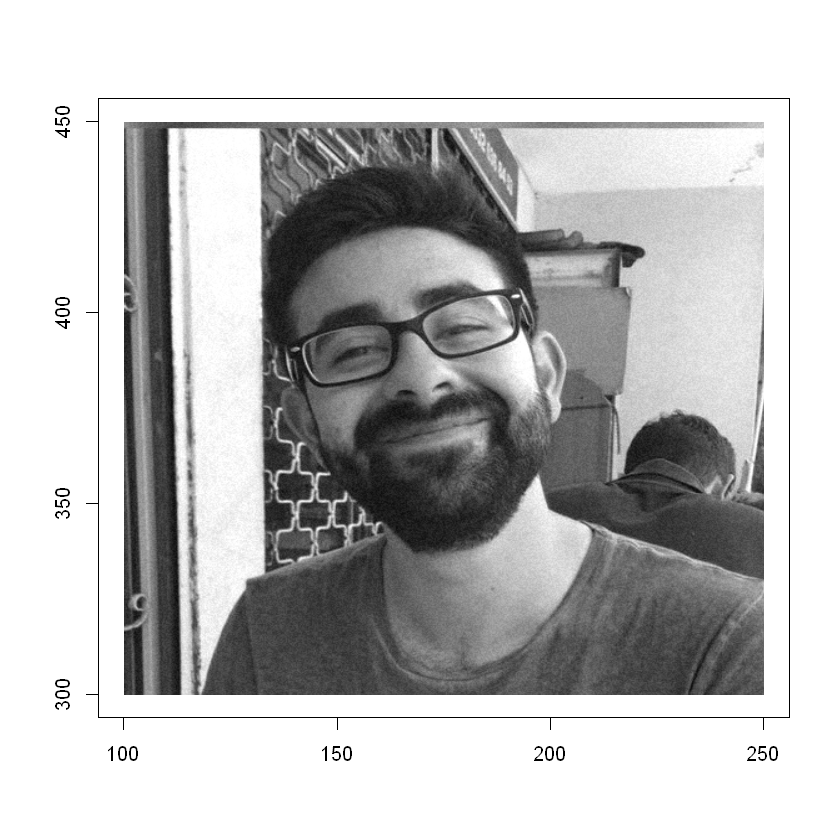

In [56]:
plot(c(100, 250), c(300, 450), type = "n", xlab = "", ylab = "")
rasterImage(noisy[,,2], 100, 300, 250, 450)

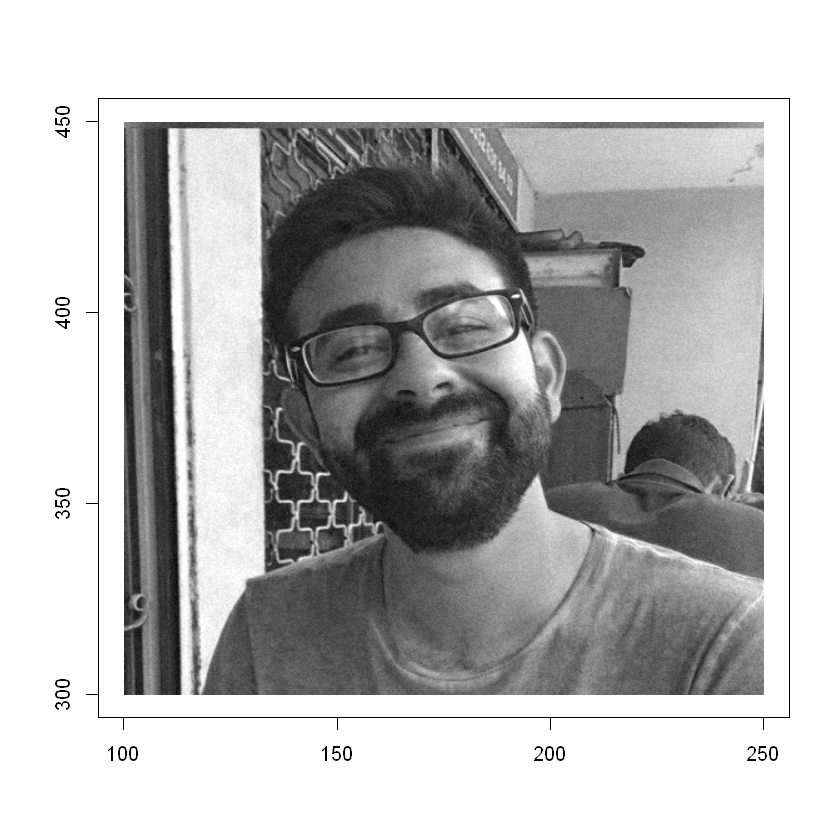

In [57]:
plot(c(100, 250), c(300, 450), type = "n", xlab = "", ylab = "")
rasterImage(noisy[,,3], 100, 300, 250, 450)

#### Extra

In [58]:
noisy2 <- picture

In [59]:
noisy2[,,1] <- noisy2[,,1] + replicate(512, runif(512, min = 0, max = 1))
noisy2[,,2] <- noisy2[,,2] + replicate(512, runif(512, min = 0, max = 1))
noisy2[,,3] <- noisy2[,,3] + replicate(512, runif(512, min = 0, max = 1))

In [60]:
noisy2[noisy2>1] <- 1

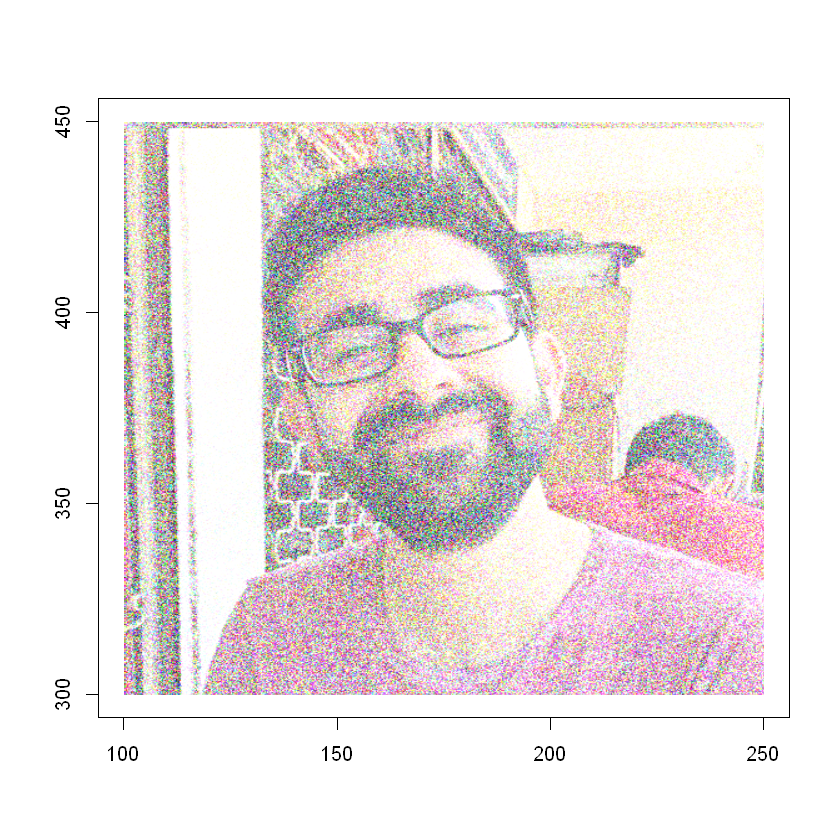

In [61]:
plot(c(100, 250), c(300, 450), type = "n", xlab = "", ylab = "")
rasterImage(noisy2, 100, 300, 250, 450)